****EXPLORATORY DATA ANALYSIS ON PUBG DATASET****

**Importing all the necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the PUBG Dataset**

In [2]:
df=pd.read_csv('data (6).csv')

In [3]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
df['assists'].describe()

count    1.111742e+06
mean     2.336738e-01
std      5.894028e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.700000e+01
Name: assists, dtype: float64

In [5]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
df_numerical = df.drop(columns = ['Unnamed: 0','Id', 'groupId', 'matchId', 'matchType'])
df_numerical

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,0,0,70.31,0,0,0,68,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,0,3,334.10,0,0,1,10,0,2,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,0,0,119.30,1,0,0,25,0,1,1,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,1,4,53.51,1,0,7,45,0,0,0,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


In [7]:
def outlier(var):
    columns = [i for i in var]
    s_columns = np.sort(columns)
    Q1 = np.percentile(columns, 25, interpolation='midpoint')
    Q2 = np.percentile(columns, 50, interpolation='midpoint')
    Q3 = np.percentile(columns, 75, interpolation='midpoint')
    IQR = Q3 - Q2
    low_limit = Q1 - 1.5 *IQR
    up_limit = Q3 + 1.5 *IQR
    Outliers = []
    for dp in s_columns:
        if (dp < low_limit) or (dp > up_limit):
            Outliers.append(dp)
    return len(Outliers)
    


**Finding out the number of Outliers in each numerical Data field**

In [8]:


pd.DataFrame({'Data Field':[i for i in df_numerical],'Number of Outliers':[outlier(df_numerical[j]) for j in df_numerical]})


,Data Field,Number of Outliers
0,assists,194611
1,boosts,35533
2,damageDealt,108425
3,DBNOs,73607
4,headshotKills,187930
5,heals,81625
6,killPlace,0
7,killPoints,0
8,kills,129163
9,killStreaks,13391


**Univariate Analysis of Few important Data Fields**

***Assists***

Lowest number of enemy players a player damaged that were killed by teammates 0
Highest number of enemy players a player damaged that were killed by teammates : 17
Total Number of outliers :  194611
Total number of missing values : 0


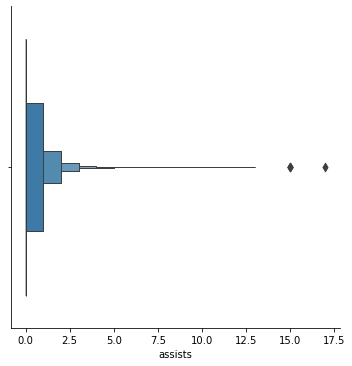

In [9]:

print("Lowest number of enemy players a player damaged that were killed by teammates", min(df['assists']))
print("Highest number of enemy players a player damaged that were killed by teammates :", max(df['assists']))
print("Total Number of outliers : ", outlier(df['assists']))
print("Total number of missing values :", (df['assists']).isnull().sum())
sns.catplot(x='assists', data=df_numerical, kind='boxen', )

***Boosts***

Highest number of boosts used : 24
Lowest number of boosts used : 0
Total number of outliers : 35533
Total number of missing values present: 0


count    1.111742e+06
mean     1.106655e+00
std      1.716050e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      2.400000e+01
Name: boosts, dtype: float64

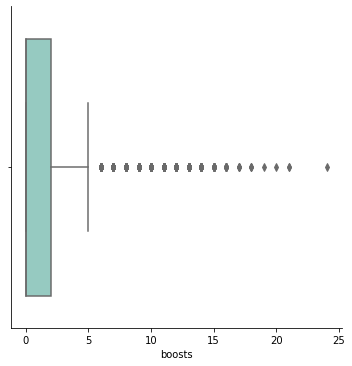

In [10]:
print("Highest number of boosts used :", max(df['boosts']))
print("Lowest number of boosts used :", min(df['boosts']))
print("Total number of outliers :", outlier(df['boosts']))
print("Total number of missing values present:", (df['boosts']).isnull().sum())
sns.catplot(x='boosts', data=df_numerical, kind='box', palette='Set3' )
df_numerical['boosts'].describe()

***Damage Dealth***

Highest Damage Dealt by a player: 5990.0
Lowest Damage Dealt : 0.0
Total number of outliers : 108425
Total number of missing values present: 0


count    1.111742e+06
mean     1.307364e+02
std      1.711755e+02
min      0.000000e+00
25%      0.000000e+00
50%      8.411000e+01
75%      1.859000e+02
max      5.990000e+03
Name: damageDealt, dtype: float64

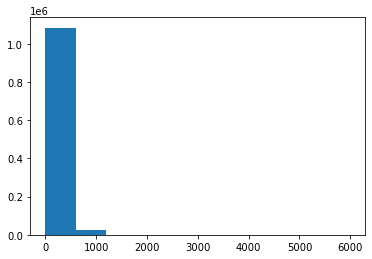

<Figure size 360x720 with 0 Axes>

In [11]:
print("Highest Damage Dealt by a player:", max(df['damageDealt']))
print("Lowest Damage Dealt :", min(df['damageDealt']))
print("Total number of outliers :", outlier(df['damageDealt']))
print("Total number of missing values present:", (df['damageDealt']).isnull().sum())
plt.hist(df_numerical['damageDealt'])
plt.figure(figsize=(5,10))
df['damageDealt'].describe()

There is no much number of damage dealt by a player as these players might be getting damaged by more experience players

***Team Kills***

Highest teamKills : 10
Lowest number of teamKills : 0
Total number of outliers : 24387
Total number of missing values present: 0
0     1087355
1       22353
2        1799
3         206
4          25
5           3
10          1
Name: teamKills, dtype: int64


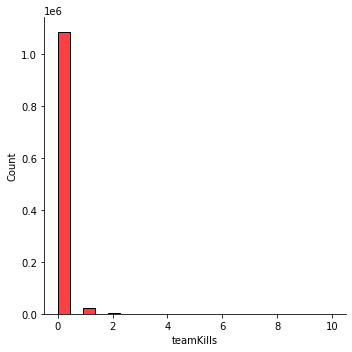

In [12]:
sns.displot(df_numerical['teamKills'], color='red')
print("Highest teamKills :", max(df['teamKills']))
print("Lowest number of teamKills :", min(df['teamKills']))
print("Total number of outliers :", outlier(df['teamKills']))
print("Total number of missing values present:", (df['teamKills']).isnull().sum())
print((df['teamKills']).value_counts())

There is only one palyer with  highest Teamkill that means the player might be a beginner.\
Majority of the players haven't killed their teammates


***Win points***

Highest win Points : 2002
Lowest number of win Points : 0
Total number of outliers : 0
Total number of missing values present: 0
0       664431
1500     38289
1501      4692
1502      4621
1499      4612
         ...  
401          1
836          1
835          1
565          1
1022         1
Name: winPoints, Length: 1160, dtype: int64


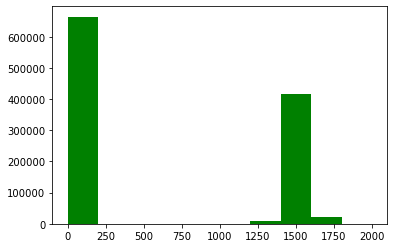

In [13]:
plt.hist(df_numerical['winPoints'], color='green')
print("Highest win Points :", max(df['winPoints']))
print("Lowest number of win Points :", min(df['winPoints']))
print("Total number of outliers :", outlier(df['winPoints']))
print("Total number of missing values present:", (df['winPoints']).isnull().sum())
print((df['winPoints']).value_counts())

Most of them have o win points as per the above plot

***Match Type***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

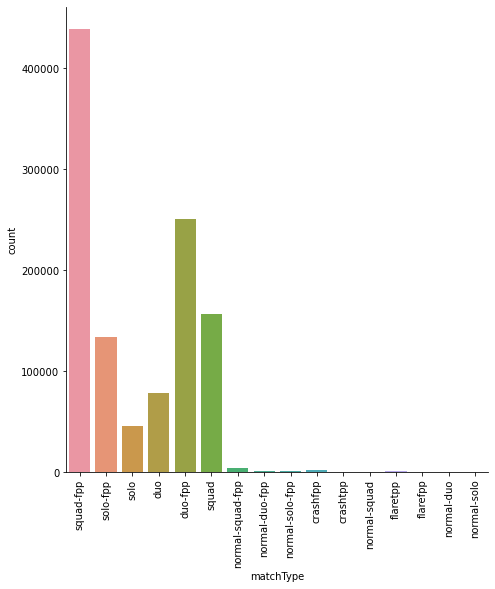

In [14]:
sns.catplot(x='matchType', data=df, kind='count', height=7 )
plt.xticks(rotation=90)

**Bivariate Analysis**

***Headshot kills and Win Points***

Text(0, 0.5, 'Winpoints')

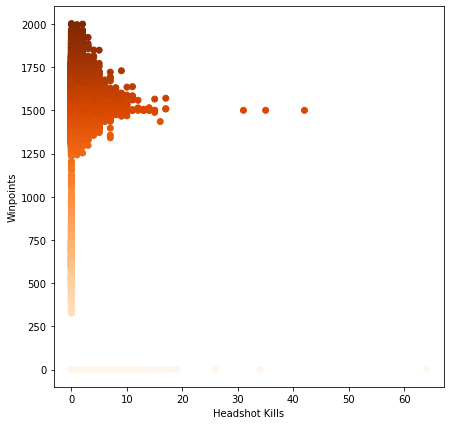

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(x=df['headshotKills'],c=df['winPoints'], y=df['winPoints'], cmap='Oranges')
plt.xlabel('Headshot Kills')
plt.ylabel('Winpoints')


***Damage Dealth VS Win Points***

Text(0, 0.5, 'Winpoints')

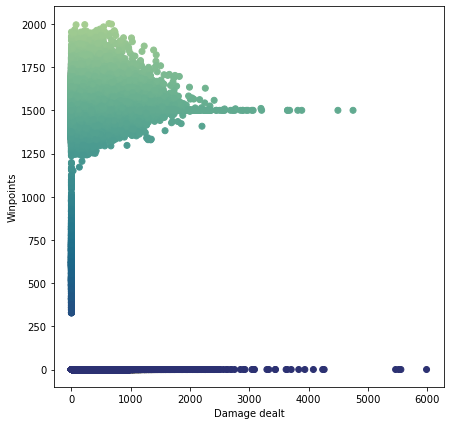

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(x=df['damageDealt'],c=df['winPoints'], y=df['winPoints'], cmap='crest_r')
plt.xlabel('Damage dealt')
plt.ylabel('Winpoints')

Winpoints are higher as the damagedealt is lower.
Higest damage dealth is 5990 and most of the players are saturated above 1250 winpoints



***Weapons Acquired VS Win Points***

Text(0, 0.5, 'Weapons Acquired')

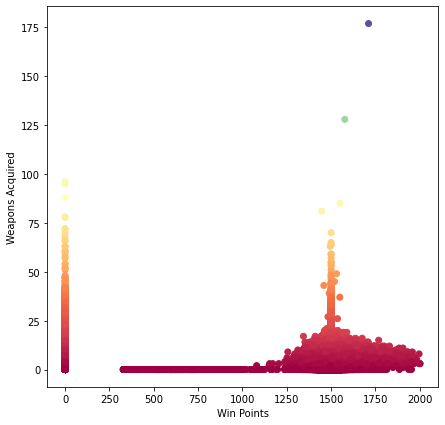

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(x=df['winPoints'], c=df['weaponsAcquired'], y=df['weaponsAcquired'], marker='o', cmap= "Spectral")
plt.xlabel('Win Points')
plt.ylabel('Weapons Acquired')

Text(0, 0.5, 'Longest Kill')

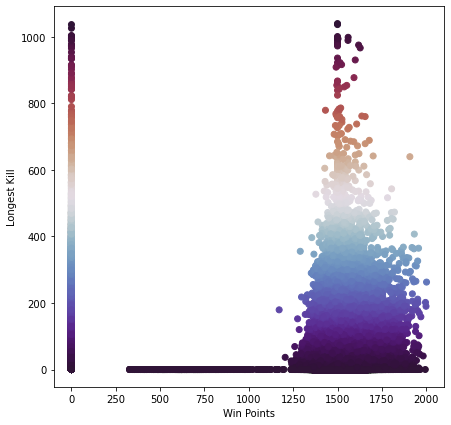

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(x=df['winPoints'], c=df['longestKill'], y=df['longestKill'], marker='o', cmap= 'twilight_shifted')
plt.xlabel('Win Points')
plt.ylabel('Longest Kill')

Most of the players having a longest kills in range of 0 to 400 have high win points greater than 1000 
few have a Longest kill greater than 800 


***Match Type VS Win points***

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ANACONDA\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ANACONDA\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


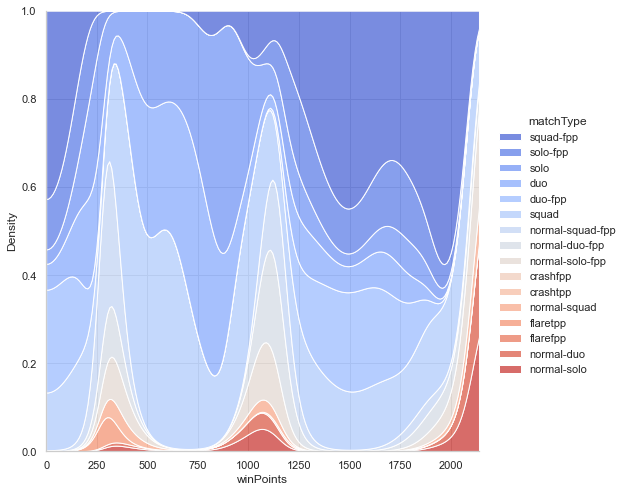

In [19]:
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="winPoints", hue="matchType",
    kind="kde", height=7,
    multiple="fill", clip=(0, None),
    palette="coolwarm"
)

For Match Type squad-fpp most of the wins points are greater than 1000 points where as\
For players who played choosing solo-fpp matchType (1250<winpoints<2000) \
Squad matchType is most frequently used as we can see its spread is more and widely distributed in the plot
matchType like normal-duo and normal-solo are played by very few players.

***Winning Palce Percentage VS Walk Distance***

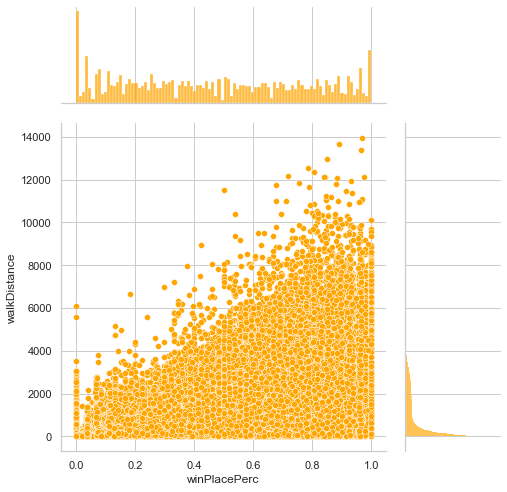

In [20]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=7, ratio=3, color="orange")
plt.show()

***Winning Palce Percentage VS Match duration***

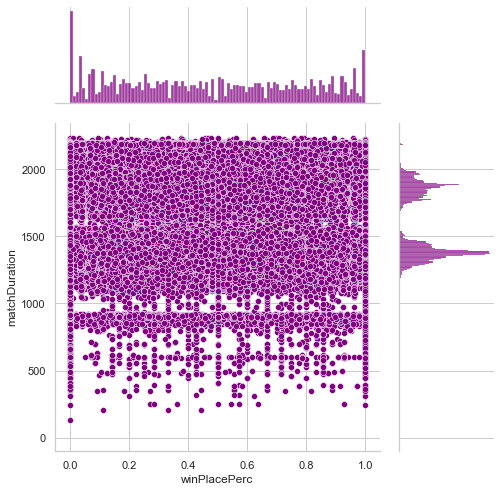

In [21]:
sns.jointplot(x='winPlacePerc', y='matchDuration', data=df, height=7, color='purple', ratio=3)
plt.show()

In [22]:
print("MAximum match duration a player has played in seconds:", max(df['matchDuration']))

MAximum match duration a player has played in seconds: 2237


There is great relation between the duration of match played and winning percentage\.
As more duration a match is been played the performance of a player increases and became more experienced.

***Winning Palce Percentage VS Kill Place***

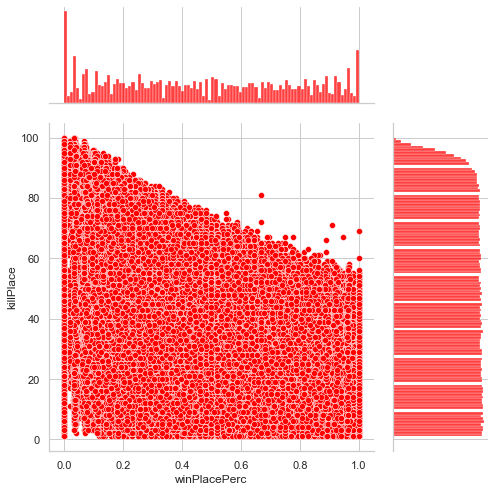

In [23]:
sns.jointplot(x='winPlacePerc', y='killPlace', data=df, height=7, color='red', ratio=3)
plt.show()

Also there is a good relation between Ranks according to number of enemy players killed and  winning percentage.

***Winning Palce Percentage VS Head shot Kills***

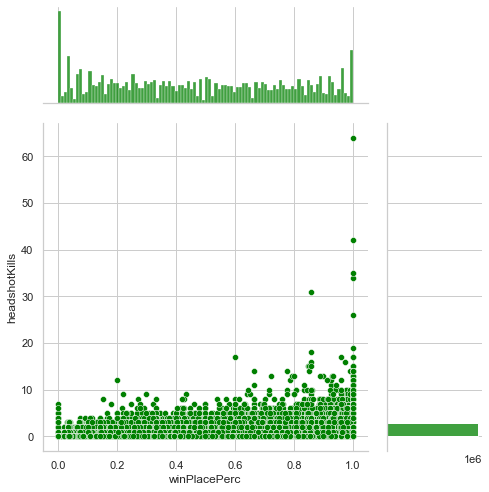

In [24]:
sns.jointplot(x='winPlacePerc', y='headshotKills', data=df, height=7, color='green', ratio=3)
plt.show()

Most of the players having headshots under 20 have a higher winning points

**Correlation Matrix**

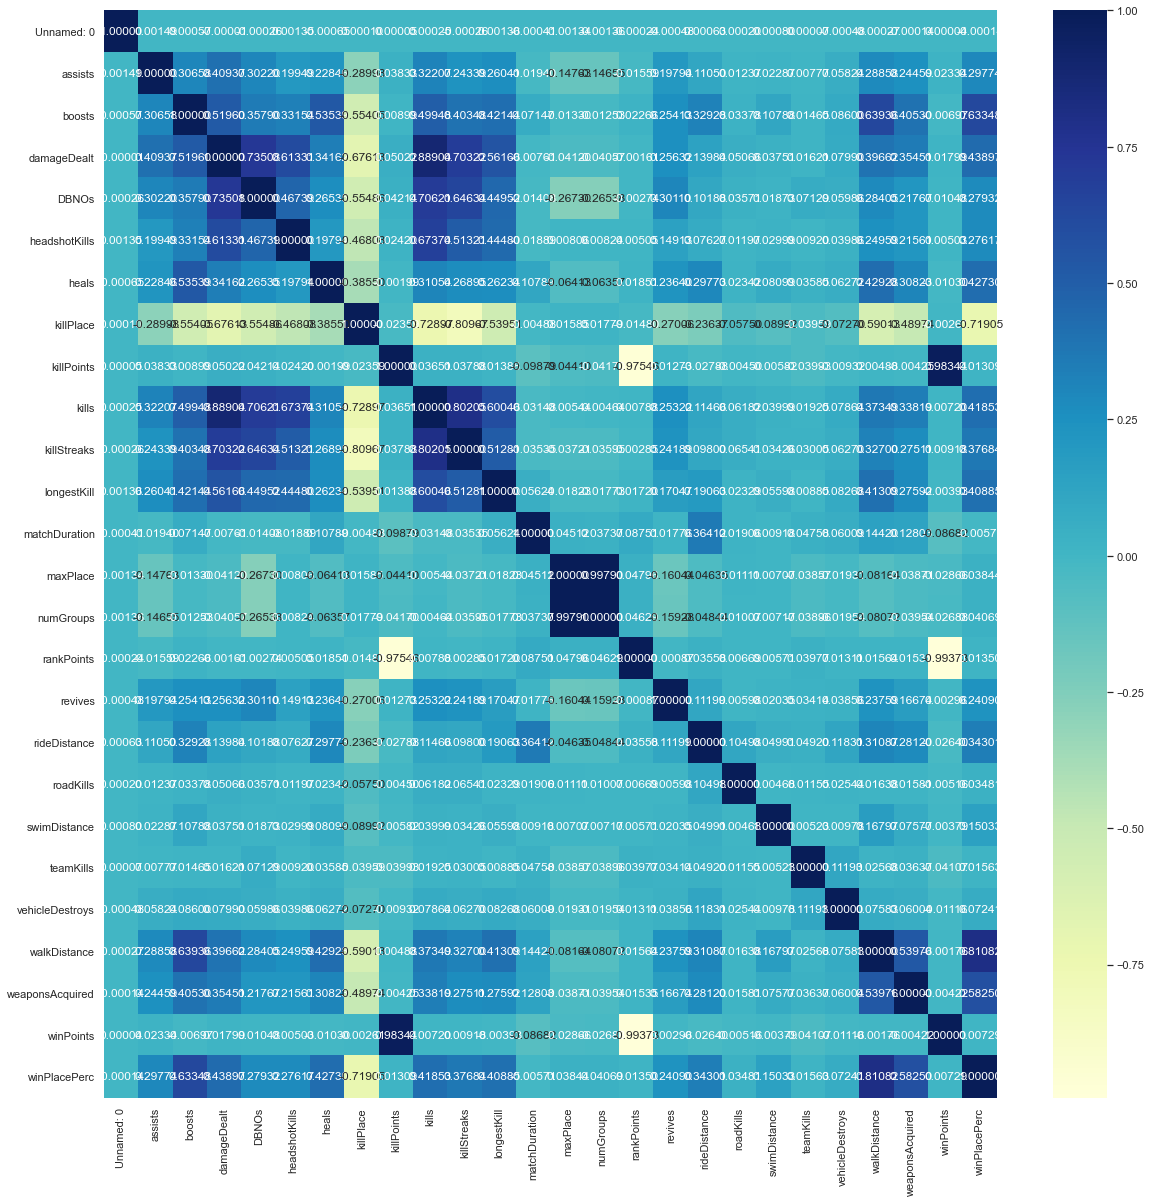

In [25]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.5f', cbar=True, linecolor='red',  cmap="YlGnBu")


We can see a correlation between various features \
If correlation is positive, one variable increases with other.\
If correlation is negative, as one variable increases, the other decreases.\
if correlation is 1, it means that either the variables are same or they are almost same\